In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#model creation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv('C:/Users/devik/Downloads/Heart-Disease-Dataset-Analysis-main/Heart-Disease-Dataset-Analysis-main/heart.csv')
df 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


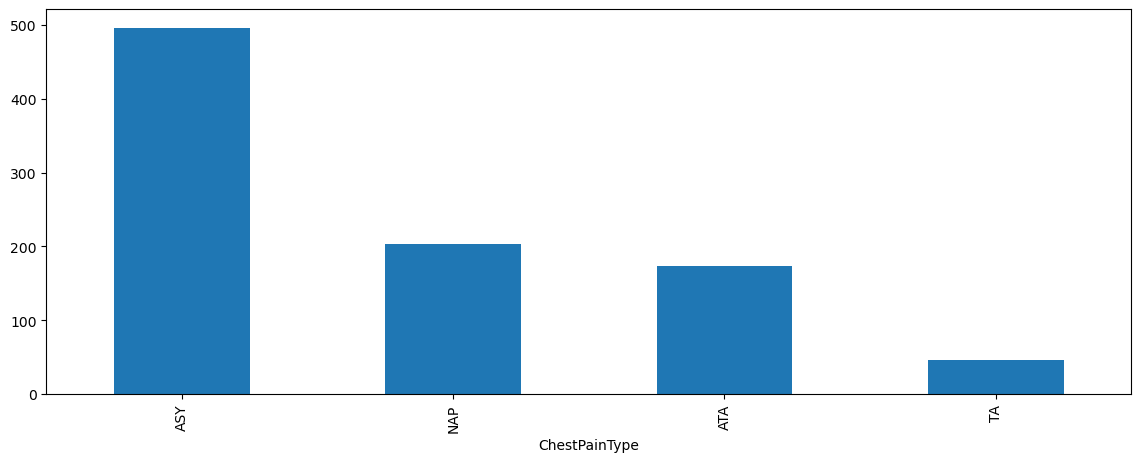

In [15]:
fig = plt.figure(figsize = (14,5))
df['ChestPainType'].value_counts().plot.bar()
plt.show()

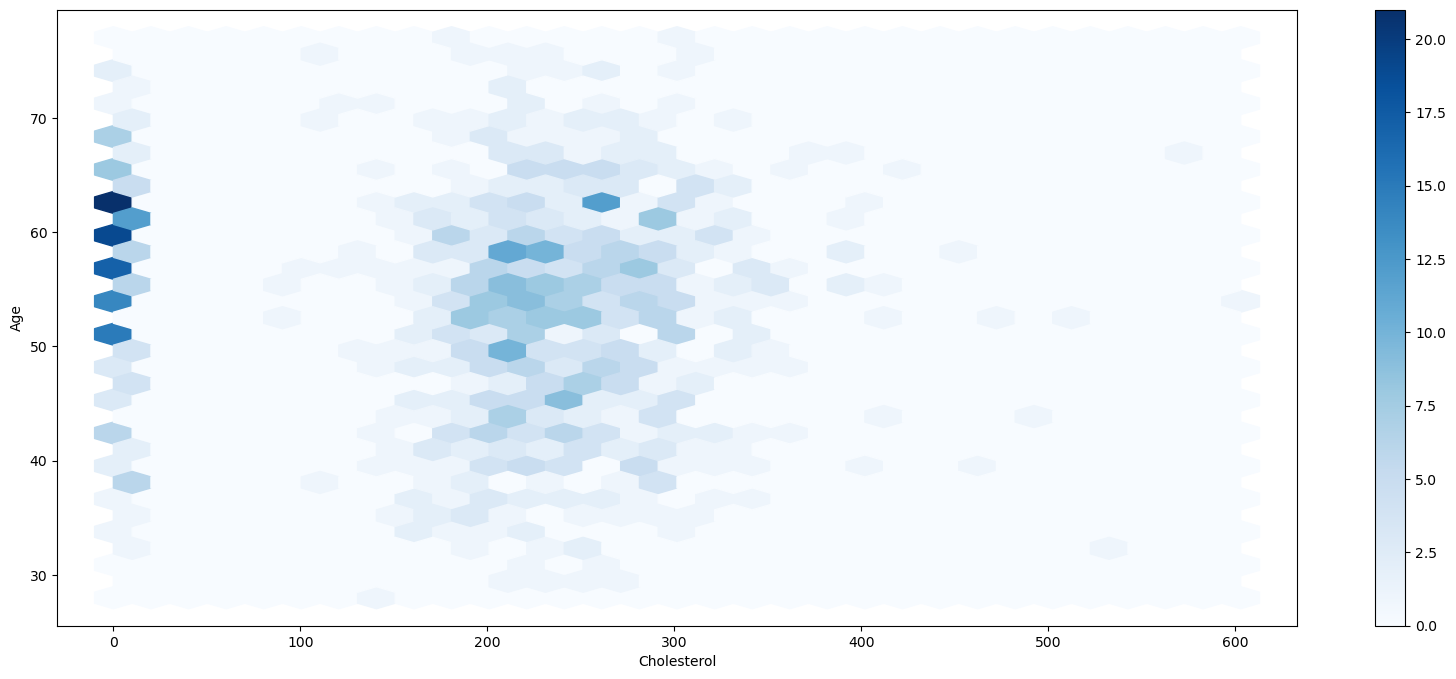

In [16]:
df.plot.hexbin(x='Cholesterol', y='Age', figsize=(20, 8), gridsize=30, cmap='Blues')
plt.show()

In [23]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the dataset into features (X) and target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
[[68  9]
 [19 88]]


In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
def predict_heart_disease(age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope):
    # Encode categorical variables
    sex = label_encoders['Sex'].transform([sex])[0]
    chest_pain_type = label_encoders['ChestPainType'].transform([chest_pain_type])[0]
    fasting_bs = label_encoders['FastingBS'].transform([fasting_bs])[0]
    resting_ecg = label_encoders['RestingECG'].transform([resting_ecg])[0]
    exercise_angina = label_encoders['ExerciseAngina'].transform([exercise_angina])[0]
    st_slope = label_encoders['ST_Slope'].transform([st_slope])[0]
    
    # Prepare input data
    input_data = [[age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope]]
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data_scaled)
    return prediction[0]

def main():
    print("Enter patient details to predict heart disease:")
    age = int(input("Age: "))
    sex = input("Sex (M/F): ")
    chest_pain_type = input("Chest Pain Type (ATA/NAP/ASY/TA): ")
    resting_bp = int(input("Resting Blood Pressure: "))
    cholesterol = int(input("Cholesterol Level: "))
    fasting_bs = int(input("Fasting Blood Sugar (0/1): "))
    resting_ecg = input("Resting ECG (Normal/ST/LVH): ")
    max_hr = int(input("Maximum Heart Rate: "))
    exercise_angina = input("Exercise Induced Angina (Y/N): ")
    oldpeak = float(input("ST Depression Induced by Exercise Relative to Rest: "))
    st_slope = input("ST Segment Slope (Up/Flat/Down): ")
    
    # Predict heart disease
    prediction = predict_heart_disease(age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope)
    
    # Output prediction
    if prediction == 1:
        print("Prediction: Patient has heart disease (1)")
    else:
        print("Prediction: Patient does not have heart disease (0)")

if __name__ == "__main__":
    main()



Enter patient details to predict heart disease:


Age:  40
Sex (M/F):  M
Chest Pain Type (ATA/NAP/ASY/TA):  ATA
Resting Blood Pressure:  200
Cholesterol Level:  100
Fasting Blood Sugar (0/1):  1
Resting ECG (Normal/ST/LVH):  Normal
Maximum Heart Rate:  140
Exercise Induced Angina (Y/N):  N
ST Depression Induced by Exercise Relative to Rest:  1.2
ST Segment Slope (Up/Flat/Down):  Flat


Prediction: Patient has heart disease (1)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


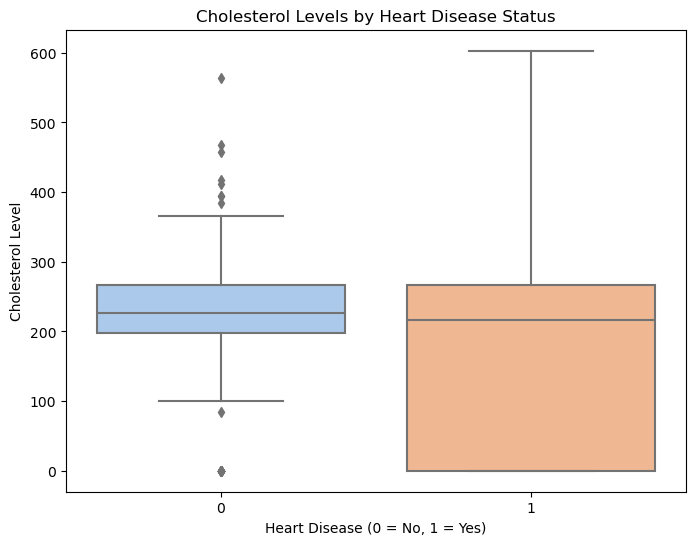

In [36]:
# Box Plot of Cholesterol by Heart Disease Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette='pastel')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.show()


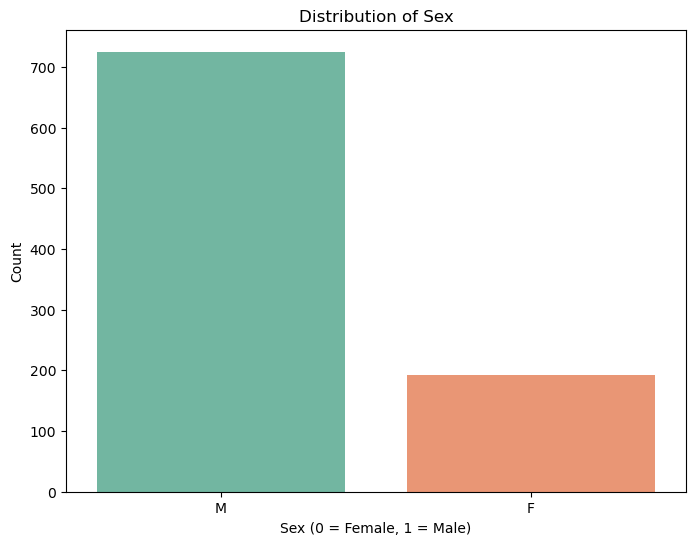

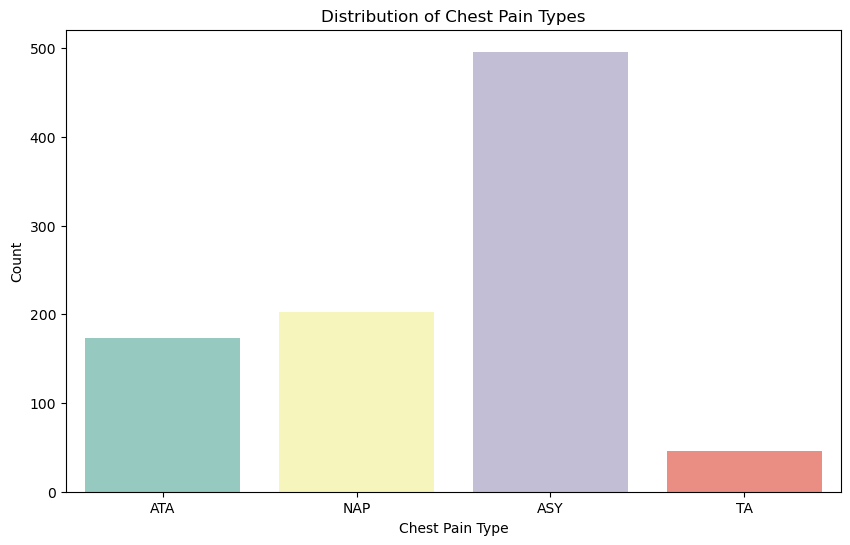

In [38]:
# Bar Chart of Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

